In [44]:
import yfinance as yf

In [45]:
sp500 = yf.Ticker("^GSPC")

In [46]:
sp500 = sp500.history(period="max")

In [47]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-07-10 00:00:00-04:00,4394.229980,4412.600098,4389.919922,4409.529785,3429600000,0.0,0.0
2023-07-11 00:00:00-04:00,4415.549805,4443.640137,4408.459961,4439.259766,3624220000,0.0,0.0
2023-07-12 00:00:00-04:00,4467.689941,4488.339844,4463.229980,4472.160156,3920290000,0.0,0.0


In [48]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-06-30 00:00:00-04:00', '2023-07-03 00:00:00-04:00',
               '2023-07-05 00:00:00-04:00', '2023-07-06 00:00:00-04:00',
               '2023-07-07 00:00:00-04:00', '2023-07-10 00:00:00-04:00',
               '2023-07-11 00:00:00-04:00', '2023-07-12 00:00:00-04:00',
               '2023-07-13 00:00:00-04:00', '2023-07-14 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=23998, freq=None)

# Data Cleaning

<Axes: xlabel='Date'>

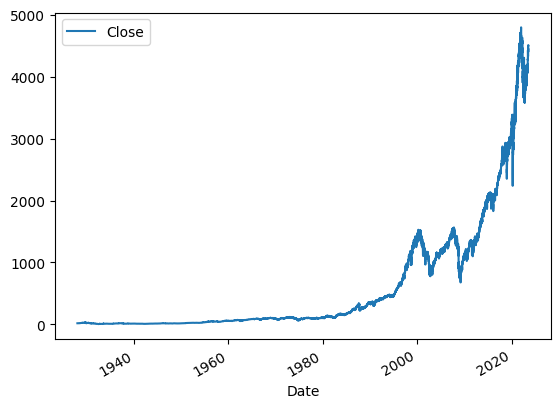

In [49]:
sp500.plot.line(y="Close", use_index=True)

In [50]:
del sp500["Dividends"]
del sp500["Stock Splits"]

# Target Setting for ML Model

In [51]:
sp500['Tomorrow'] = sp500['Close'].shift(-1)

In [52]:
sp500['Target'] = (sp500['Tomorrow'] > sp500['Close']).astype(int)

In [53]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-07-10 00:00:00-04:00,4394.229980,4412.600098,4389.919922,4409.529785,3429600000,4439.259766,1
2023-07-11 00:00:00-04:00,4415.549805,4443.640137,4408.459961,4439.259766,3624220000,4472.160156,1
2023-07-12 00:00:00-04:00,4467.689941,4488.339844,4463.229980,4472.160156,3920290000,4510.040039,1


In [54]:
sp500 = sp500.loc['1990-01-01':].copy()

In [55]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-07-10 00:00:00-04:00,4394.229980,4412.600098,4389.919922,4409.529785,3429600000,4439.259766,1
2023-07-11 00:00:00-04:00,4415.549805,4443.640137,4408.459961,4439.259766,3624220000,4472.160156,1
2023-07-12 00:00:00-04:00,4467.689941,4488.339844,4463.229980,4472.160156,3920290000,4510.040039,1


In [56]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)
# for more accurate results, use n_estimators=1000, min_samples_split=10

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ['Open', 'High', 'Low', 'Close', 'Volume']
model.fit(train[predictors], train['Target'])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [57]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [58]:
import pandas as pd

preds = pd.Series(preds, index=test.index)

In [59]:
precision_score(test['Target'], preds)

0.6086956521739131

In [60]:
combined = pd.concat([test['Target'], preds], axis=1)

<Axes: xlabel='Date'>

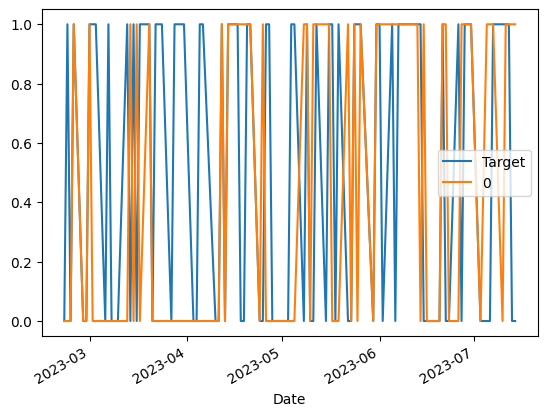

In [61]:
combined.plot()

# BackTesting Model

In [62]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [63]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [65]:
predictions = backtest(sp500, model, predictors)

In [66]:
predictions["Predictions"].value_counts()

Predictions
0    3410
1    2538
Name: count, dtype: int64

In [67]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5244286840031521

In [68]:
predictions["Target"].value_counts()/predictions.shape[0]

Target
1    0.533961
0    0.466039
Name: count, dtype: float64

In [69]:
horizons = [2, 5, 60, 250, 1000]

In [70]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors+= [ratio_column, trend_column]

In [71]:
sp500 = sp500.dropna(subset=sp500.columns[sp500.columns != "Tomorrow"])

In [72]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [73]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [74]:
predictions = backtest(sp500, model, new_predictors)

In [75]:
predictions["Predictions"].value_counts()

Predictions
0.0    4131
1.0     817
Name: count, dtype: int64

In [76]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5691554467564259

ahh not that accurate